# Logistic regression  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading data from our dataset

In [2]:
data = np.loadtxt('data/ex2data1.txt',delimiter=',')

# m = number of rows
m = len(data)
# x is a np.array of 1 with dimensions (row X len(row[0]) ie columns)
x = np.ones((m,len(data[0])))
# now we populate the data of 2D array, still we know column 0 is populated with 1s
for col in range (len(data[0])-1):
    x[:,col+1] = data[:,col]
# now just extract the last columns for y values
y = np.zeros((m,1))
y[:,0] = data[:,len(data[0])-1]

print(y[1:5])
print(x[1:5,:])
print(y.shape)
print(x.shape)

[[ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]
[[  1.          30.28671077  43.89499752]
 [  1.          35.84740877  72.90219803]
 [  1.          60.18259939  86.3085521 ]
 [  1.          79.03273605  75.34437644]]
(100, 1)
(100, 3)


In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

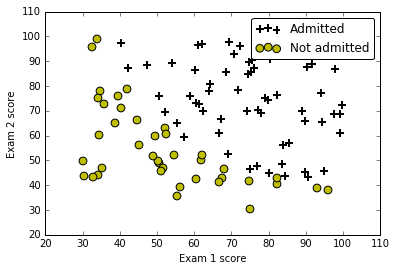

In [4]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

# 2. Initializing the theta parameters

In [5]:
def init_theta():
    return np.random.rand(len(x[0]),1)*0

print(init_theta().shape)

(3, 1)


# 3. Defining the sigmoid function

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 4. Defining the evaluationg function

In [7]:
'''
there are two options:
-a) we multiply the whole matrix by the theta parameters
    ie. [x00 x10 x20 x30]              [theta1]         [x00*theta1 + x10*theta2 + x20*theta3 + x30*theta4]
        [x01 x11 x21 x31]              [theta2]         [x01*theta1 + x11*theta2 + x21*theta3 + x31*theta4]
        .....                 x        [theta3]     =     ....
        [x0n x1n x2n x3n]              [theta4]         [x0n*theta1 + x1n*theta2 + x2n*theta3 + x3n*theta4]
        
        ie nx4 X 4x1 = nx1
-b) we multiply each row specially against theta parameters
    - ie extract
    x[0] ===>  [x00 x10 x20 x30] 
   
    and with theta being
     [theta1]       
     [theta2]        
     [theta3]  
     [theta4]
    then just x.dot(theta) (ie 1x4 X 4x1 = 1)
    or also we can do theta.T.dot(x.T) by andrew ng notation
'''


def evaluate(x,theta):
    res = x.dot(theta)
    return res


## 5. Defining the cost,gradient and gradient descent functions

We define the cost function by the formula from Andrew Ng
- this is a lot of magic but we used the formula from andrew ng's exercise file

In [8]:
def cost(theta, x, y):
    h = sigmoid(x.dot(theta))
    # here y.T is 1x100 and log(h) is just log(x) applied to every field in matrix x
    # the 1-y is just a matrix of 100x1 one's minus the 100x1 y matrix, and then we use it's transpose to multiply by log(h) 100x1
    # the values of matrix multiplication are actually the sum we are looking for, try to prove it if you don't understand!!
    summ = (-1/m)*  (y.T.dot(np.log(h))  +  (1-y).T.dot(np.log(1 - h)))
    return summ[0]

In [9]:
# TESTS
theta = init_theta()
cost_value = cost(theta,x,y)
print(cost_value)

[ 0.69314718]


In the course Andrew Ng asks for the value of initial gradient

In [21]:
def gradient(theta,x,y):
    return (1/m)*(x.T.dot((sigmoid(x.dot(theta))-y)))

In [22]:
# TESTS
theta = init_theta()
gradient_value = gradient(theta,x,y)
print(gradient_value)

[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


Now we define the gradient used for testing how well the function can be optimized

In [23]:
iterations=1000000
alpha = 0.001
def gradient_descent(theta,x,y):
    for i in range (iterations):
        theta = theta - alpha*(1/m)*(x.T.dot((sigmoid(x.dot(theta))-y)))
    return theta

In [24]:
# TESTS
theta = init_theta()
print('initial theta', theta)
print('old cost value',cost(theta,x,y))
theta = gradient_descent(theta,x,y)
print('new theta', theta)
print('new_cost_value',cost(theta,x,y))

initial theta [[ 0.]
 [ 0.]
 [ 0.]]
old cost value [ 0.69314718]
new theta [[-15.39517866]
 [  0.12825989]
 [  0.12247929]]
new_cost_value [ 0.22465416]


### 6. Let's see how our results perform

In [88]:
def predict(x):
    # we can easily get the final result
    result = sigmoid(x.dot(theta))
    # now we have to get the sticking point of 0.5
    result = [int(i>=0.5) for i in result]
    return result

# now lets
match_count = 0
result = predict(x)
for i in range(len(y)):
    if (i < 5):
        print(result[i],y[i])
    if (result[i] == y[i]):
        match_count +=1
print("Matched:",match_count/len(y)*100,'% percent')

0 [ 0.]
0 [ 0.]
0 [ 0.]
1 [ 1.]
1 [ 1.]
Matched: 89.0 % percent


# Regularized logistic regression

## Loading the data

In [89]:
data2 = np.loadtxt('data/ex2data2.txt',delimiter=',')
m2 = len(data2)
x2 = np.ones((m2,len(data2[0])))
# now we populate the data of 2D array, still we know column 0 is populated with 1s
for col in range (len(data2[0])-1):
    x2[:,col+1] = data2[:,col]
# now just extract the last columns for y values
y2 = np.zeros((m2,1))
y2[:,0] = data2[:,len(data[0])-1]
print(x2[0:5])
print(y2[20:25])

[[ 1.        0.051267  0.69956 ]
 [ 1.       -0.092742  0.68494 ]
 [ 1.       -0.21371   0.69225 ]
 [ 1.       -0.375     0.50219 ]
 [ 1.       -0.51325   0.46564 ]]
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


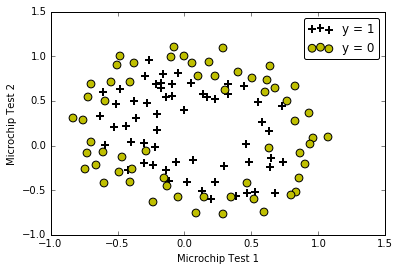

In [90]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

### This is the feature mapping procedure
    - since it's explained poorly and premade by Andrew in MATLAB, I just used the standard library

In [91]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
xx = poly.fit_transform(x2[:,1:3])
print(x2.shape)
print(xx.shape)

(118, 3)
(118, 28)


In [92]:
def init_theta2():
    return np.random.rand(len(xx[0]),1)

def cost2(theta,x,y,lambda_val):
    h = sigmoid(x.dot(theta))
    m = len(x)
    val = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1 - h))) + lambda_val/(2*m) * (theta**2).sum()
    return val

In [98]:
theta2 = init_theta2()
lambda_val = 1
iterations = 100000
alpha = 0.01
cost2(theta2,xx,y2,lambda_val)

array([[ 1.27611326]])

In [99]:
def gradient_descent2(x,y,theta,lambda_val):
    for i in range (iterations):
        theta = theta - alpha*( (1/m)*(x.T.dot((sigmoid(x.dot(theta)) - y))) - ((lambda_val/len(x))*theta))
    return theta

def gradient_descent22(x,y,theta,lambda_val):
    for i in range (iterations):
        theta = theta*(1-alpha*lambda_val/len(x)) - alpha*( (1/m)*(x.T.dot((sigmoid(x.dot(theta)) - y))))
    return theta

In [100]:
theta_new = gradient_descent22(xx,y2,init_theta2()*0,lambda_val)


In [101]:
def predict(x,theta):
    # we can easily get the final result
    result = sigmoid(x.dot(theta))
    # now we have to get the sticking point of 0.5
    result = [int(i>=0.5) for i in result]
    return result

# now lets
match_count = 0
result2 = predict(xx,theta_new)
for i in range(len(xx)):
    if (result2[i] == y2[i]):
        match_count +=1
print("Matched:",match_count/len(xx)*100,'% percent')

Matched: 81.35593220338984 % percent


In [102]:
print(cost2(theta_new,xx,y2,lambda_val))

[[ 0.53618069]]
